### Required libraries for machine learning  and set seaborn style
### ----------------------------------------------------------------------------------------

In [36]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import AdaBoostClassifier , BaggingClassifier , GradientBoostingClassifier , RandomForestClassifier , ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler , RobustScaler , MinMaxScaler , OneHotEncoder , LabelEncoder
from category_encoders import BinaryEncoder
from sklearn.svm import LinearSVC , SVC 
from sklearn.tree import DecisionTreeClassifier , ExtraTreeClassifier
from sklearn.model_selection import cross_validate , RepeatedStratifiedKFold , RandomizedSearchCV ,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB , BernoulliNB 
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')
from sklearn.feature_selection import SelectFromModel  
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
sns.set_theme(context = 'notebook' , palette = 'seismic' , font_scale = 0.8 , style = 'darkgrid' , rc = {'figure.figsize':[16 , 7]})


D:\anaconda\envs\epsilon_eslam\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
D:\anaconda\envs\epsilon_eslam\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


### scanning the file to dataframe 
### ------------------------------------------

In [2]:
df = pd.read_csv('Credit_card_data.csv')
df

,Unnamed: 0,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,2,0x1604,CUS_0xd40,March,Aaron Maashoh,33,821-00-0265,Scientist,19114.12,1824.843333,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
1,3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
2,6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
3,7,0x1609,CUS_0xd40,August,NaN,23,NaN,Scientist,19114.12,1824.843333,...,Good,809.98,23.933795,22 Years and 7 Months,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
4,8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,other,34847.84,3037.986667,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50754,99020,0x25fd3,CUS_0xaf61,June,Chris Wickhamm,50,133-16-7738,Writer,37188.10,3097.008333,...,Good,620.64,37.753013,30 Years and 2 Months,NM,84.205949,147.339908,Low_spent_Small_value_payments,368.154976,Good
50755,99023,0x25fda,CUS_0x8600,January,Sarah McBridec,28,031-35-0942,Architect,20002.88,1929.906667,...,Bad,3571.70,22.895966,5 Years and 8 Months,Yes,60.964772,43.370670,High_spent_Large_value_payments,328.655224,Poor
50756,99025,0x25fdc,CUS_0x8600,March,NaN,28,031-35-0942,Architect,20002.88,1929.906667,...,Bad,3571.70,24.713861,5 Years and 10 Months,Yes,60.964772,76.282793,Low_spent_Small_value_payments,345.743101,Poor
50757,99029,0x25fe0,CUS_0x8600,July,Sarah McBridec,28,031-35-0942,Architect,20002.88,1929.906667,...,Bad,3571.70,25.123535,6 Years and 1 Months,Yes,60.964772,173.275503,Low_spent_Large_value_payments,228.750392,Standard


### check duplicated ?
### ---------------------------

In [3]:
df.duplicated().sum()

0

### number of NaN valuses in each coulmns 
### ----------------------------------------------------------

In [4]:
df.isnull().sum()

Unnamed: 0                     0
ID                             0
Customer_ID                    0
Month                          0
Name                        5102
Age                            0
SSN                         2796
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
dtype: int64

### exploring categorical data to drop useless coulmns and start data preprocessing 
### --------------------------------------------------------------------------------------------------------------------

In [5]:
len(df['SSN'].unique())

10626

In [6]:
len(df['Type_of_Loan'].unique())

6185

In [7]:
df['Payment_Behaviour'].unique()

array(['Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'High_spent_Small_value_payments',
       'Low_spent_Large_value_payments'], dtype=object)

### drop useless coulmns 
### --------------------------------

In [8]:
df.drop(['Unnamed: 0' , 'Customer_ID' , 'ID' , 'Name' , 'Type_of_Loan' , 'SSN'] , axis = 1  , inplace = True)

### feature engineering 
### ----------------------------

In [9]:
df['Credit_History_Age'].apply(lambda x : x.split("and"))

0        [22 Years ,  3 Months]
1        [22 Years ,  4 Months]
2        [22 Years ,  7 Months]
3        [22 Years ,  7 Months]
4        [26 Years ,  7 Months]
                  ...          
50754    [30 Years ,  2 Months]
50755     [5 Years ,  8 Months]
50756    [5 Years ,  10 Months]
50757     [6 Years ,  1 Months]
50758     [6 Years ,  3 Months]
Name: Credit_History_Age, Length: 50759, dtype: object

In [10]:
df['Credit_History_Age_years']=df['Credit_History_Age'].apply(lambda x : x.split("and")[0])

In [11]:
df.Credit_History_Age_years = df['Credit_History_Age_years'].apply(lambda x : x.replace("Years" , "")) 
## clean feature

In [12]:
df['Credit_History_Age_years']= df['Credit_History_Age_years'].astype(int)

In [13]:
df.drop('Credit_History_Age' , axis = 1 , inplace = True)

In [14]:
df['Credit_History_Age_years']

0        22
1        22
2        22
3        22
4        26
         ..
50754    30
50755     5
50756     5
50757     6
50758     6
Name: Credit_History_Age_years, Length: 50759, dtype: int32

### encode the target and all features 
### ------------------------------------------------

#### Credit_Score is a taret 

In [15]:
encoder  = LabelEncoder()
df['Credit_Score'] = encoder.fit_transform(df['Credit_Score']) #{poor : 1} {good : 0} {standred : 2}

In [16]:
df['Credit_Score']

0        0
1        0
2        0
3        2
4        2
        ..
50754    0
50755    1
50756    1
50757    2
50758    2
Name: Credit_Score, Length: 50759, dtype: int32

#### month must label encoder by mapping 

In [17]:
emcoding_months = {'March' :3,  'June' : 5 ,'January':1,  'July':7 ,'February': 2 , 'April' : 4, 'May' : 5 , 'August':8}

In [18]:
df['Month']= df['Month'].map(emcoding_months)

In [19]:
df['Month']

0        3
1        4
2        7
3        8
4        1
        ..
50754    5
50755    1
50756    3
50757    7
50758    8
Name: Month, Length: 50759, dtype: int64

#### encode unlabel coulmns by OneHotEncoder 

In [20]:
encoder = OneHotEncoder(sparse=False , drop='first')

In [21]:
transformed = encoder.fit_transform(df[['Occupation' , 'Payment_Behaviour' , 'Payment_of_Min_Amount' ,'Credit_Mix']])

In [22]:
transformed_df = pd.DataFrame(transformed , columns=encoder.get_feature_names_out())

In [23]:
transformed_df

,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,...,Occupation_other,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Credit_Mix_Good,Credit_Mix_Standard
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
50755,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
50756,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
50757,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
df = pd.concat([df , transformed_df] , axis = 1)

In [25]:
df.drop(['Occupation' , 'Payment_Behaviour' , 'Month' , 'Payment_of_Min_Amount' ,'Credit_Mix'], axis = 1 , inplace =True)

### now we will split the data to x , y to make our pipline and model  
### -------------------------------------------------------------------------------------------

In [26]:
x=df.drop('Credit_Score',axis=1)
y=df['Credit_Score']

#### start making firt pipline 
#### ----------------------------------

In [93]:
steps0 = list()
steps0.append(("selector" ,SelectFromModel(DecisionTreeClassifier())))
steps0.append(("scaler" , RobustScaler()))
steps0.append(("model" , DecisionTreeClassifier()))

In [94]:
from sklearn import set_config
set_config(display="diagram")
big_one = Pipeline(steps=steps0)
big_one

Pipeline(steps=[('selector',
                 SelectFromModel(estimator=DecisionTreeClassifier())),
                ('scaler', RobustScaler()),
                ('model', DecisionTreeClassifier())])

### cross valdiation for test the model 
### -------------------------------------------------

In [95]:
%%time
scores = cross_validate(big_one , x , y , cv = 5 , scoring="accuracy" , return_train_score=True , n_jobs=-1)

CPU times: total: 62.5 ms
Wall time: 5.07 s



#### Evaluating Model Performance

In [96]:
scores['train_score'].mean()

1.0

In [97]:
scores['test_score'].mean()

0.5969384283140187

#### fit (x,y) to get  Feature Importance

In [98]:
big_one.fit(x,y)

Pipeline(steps=[('selector',
                 SelectFromModel(estimator=DecisionTreeClassifier())),
                ('scaler', RobustScaler()),
                ('model', DecisionTreeClassifier())])

In [99]:
big_one['model'].feature_importances_

array([0.04617715, 0.04123156, 0.0421106 , 0.06356678, 0.06637009,
       0.04514305, 0.06679501, 0.02899165, 0.19021494, 0.07125448,
       0.05848955, 0.06378439, 0.06515418, 0.04022651, 0.11049005])

### Model Tuning by RandomizedSearchCV 
### ---------------------------------------------------------

In [119]:
param = [     {'model__criterion' : ['gini','entropy'],  
                   'model__splitter' : ['best' , 'random'],  
                   'model__max_depth' : range(10,40),    
                   'model__min_samples_leaf' : range(1,10),     
                   'model__min_samples_split': [2, 5, 10],  
                   'model__max_features' : ['auto','log2','sqrt',None],   
                   'model__max_leaf_nodes' : range(10,40)  }]

In [120]:
search = RandomizedSearchCV(estimator=big_one, param_distributions=param, random_state=42, n_iter=20, cv=3, verbose=1, return_train_score=True )

#### fit (X,y) by RandomizedSearchCV 

In [121]:
%%time
search.fit(x, y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
CPU times: total: 50.6 s
Wall time: 50.7 s


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('selector',
                                              SelectFromModel(estimator=DecisionTreeClassifier())),
                                             ('scaler', RobustScaler()),
                                             ('model',
                                              DecisionTreeClassifier())]),
                   n_iter=20,
                   param_distributions=[{'model__criterion': ['gini',
                                                              'entropy'],
                                         'model__max_depth': range(10, 40),
                                         'model__max_features': ['auto', 'log2',
                                                                 'sqrt', None],
                                         'model__max_leaf_nodes': range(10, 40),
                                         'model__min_samples_leaf': range(1, 10),
                                         'model__min_samples_split': [2, 5, 10],
                                         'model__splitter': ['best',
                                                             'random']}],
                   random_state=42, return_train_score=True, verbose=1)

#### get best paramters for this model 

In [122]:
search.best_params_

{'model__splitter': 'best',
 'model__min_samples_split': 5,
 'model__min_samples_leaf': 6,
 'model__max_leaf_nodes': 39,
 'model__max_features': None,
 'model__max_depth': 19,
 'model__criterion': 'entropy'}

### Evaluating Model Performance
### --------------------------------------------

In [123]:
search.cv_results_["mean_train_score"].max()

0.7189956518596344

In [124]:
search.cv_results_["mean_test_score"].max()

0.711322122078819

In [125]:
search.fit(x,y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('selector',
                                              SelectFromModel(estimator=DecisionTreeClassifier())),
                                             ('scaler', RobustScaler()),
                                             ('model',
                                              DecisionTreeClassifier())]),
                   n_iter=20,
                   param_distributions=[{'model__criterion': ['gini',
                                                              'entropy'],
                                         'model__max_depth': range(10, 40),
                                         'model__max_features': ['auto', 'log2',
                                                                 'sqrt', None],
                                         'model__max_leaf_nodes': range(10, 40),
                                         'model__min_samples_leaf': range(1, 10),
                                         'model__min_samples_split': [2, 5, 10],
                                         'model__splitter': ['best',
                                                             'random']}],
                   random_state=42, return_train_score=True, verbose=1)

### apply feature selection for this model 
### ------------------------------------------------------

In [126]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [127]:
fs = SelectKBest(score_func=f_classif, k=15) #selectiong best features corrleted 

In [128]:
X_selected = fs.fit_transform(x , y)

In [129]:
cols = fs.get_support(indices=True) #get names of the features by get_support 

In [130]:
fs

SelectKBest(k=15)

In [131]:
features_df_new = x.iloc[:,cols]

### features selection new dataframe we will train the model in this fetures  
### ---------------------------------------------------------------------------------------------------

In [132]:
features_df_new

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_History_Age_years,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Credit_Mix_Good,Credit_Mix_Standard
0,19114.12,1824.843333,3,4,3,3,7.0,11.27,4.0,809.98,22,1.0,0.0,1.0,0.0
1,19114.12,1824.843333,3,4,3,5,4.0,6.27,4.0,809.98,22,1.0,0.0,1.0,0.0
2,19114.12,1824.843333,3,4,3,3,8.0,11.27,4.0,809.98,22,1.0,0.0,1.0,0.0
3,19114.12,1824.843333,3,4,3,3,6.0,11.27,4.0,809.98,22,1.0,0.0,1.0,0.0
4,34847.84,3037.986667,2,4,6,3,4.0,5.42,2.0,605.03,26,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50754,37188.10,3097.008333,1,4,5,5,12.0,5.38,3.0,620.64,30,0.0,0.0,1.0,0.0
50755,20002.88,1929.906667,10,8,29,35,26.0,18.31,9.0,3571.70,5,0.0,1.0,0.0,0.0
50756,20002.88,1929.906667,10,8,29,33,25.0,18.31,9.0,3571.70,5,0.0,1.0,0.0,0.0
50757,20002.88,1929.906667,10,8,29,33,26.0,18.31,9.0,3571.70,6,0.0,1.0,0.0,0.0


### splitting the data to train and test by train_test_split
### --------------------------------------------------------------------------

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
# x = new features is features selection from the dataa frame 
x_train , x_test , y_train , y_test = train_test_split(features_df_new,y ,
                                                       test_size=0.01 , shuffle=True , random_state=7 , stratify=y) 

In [150]:
from imblearn.over_sampling import RandomOverSampler , SMOTE
rs = SMOTE()
x_train , y_train =rs.fit_resample(x_train , y_train)

In [151]:
y_train.value_counts()

2    26736
0    26736
1    26736
Name: Credit_Score, dtype: int64

In [152]:
search.fit(x_train , y_train) ## fit the data 

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('selector',
                                              SelectFromModel(estimator=DecisionTreeClassifier())),
                                             ('scaler', RobustScaler()),
                                             ('model',
                                              DecisionTreeClassifier())]),
                   n_iter=20,
                   param_distributions=[{'model__criterion': ['gini',
                                                              'entropy'],
                                         'model__max_depth': range(10, 40),
                                         'model__max_features': ['auto', 'log2',
                                                                 'sqrt', None],
                                         'model__max_leaf_nodes': range(10, 40),
                                         'model__min_samples_leaf': range(1, 10),
                                         'model__min_samples_split': [2, 5, 10],
                                         'model__splitter': ['best',
                                                             'random']}],
                   random_state=42, return_train_score=True, verbose=1)

### predict on x_test and get predicted to evaluate the model 
### ----------------------------------------------------------------------------------

In [153]:
y_pred_test = search.predict(x_test)

In [154]:
y_pred_train = search.predict(x_train)

### import all metrics we want to evaluate our model 
### ----------------------------------------------------------------------

In [155]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , ConfusionMatrixDisplay

In [156]:
print("Train accuracy_score  is " , accuracy_score(y_train ,y_pred_train ))
print("test accuracy_scoreis " , accuracy_score(y_test , y_pred=y_pred_test))

Train accuracy_score  is  0.7425069818471973
test accuracy_scoreis  0.6948818897637795


In [157]:
print("Train precision_score  is " , precision_score(y_train ,y_pred_train , average='weighted' ))
print("test precision_score " , precision_score(y_test , y_pred=y_pred_test , average='weighted'))

Train precision_score  is  0.7403146597315252
test precision_score  0.7346281722056066


In [158]:
print("Train recall_score  is " , recall_score(y_train ,y_pred_train , average='weighted' ))
print("test recall_score " , recall_score(y_test , y_pred=y_pred_test , average='weighted'))

Train recall_score  is  0.7425069818471973
test recall_score  0.6948818897637795


In [159]:
print("Train f1_score  is " , f1_score(y_train ,y_pred_train , average='weighted' ))
print("test f1_score " , f1_score(y_test , y_pred=y_pred_test , average='weighted'))

Train f1_score  is  0.7393825736237065
test f1_score  0.6970221862574361


Text(0.5, 1.0, 'Confusion Matrix for DecisionTreeClassifier')

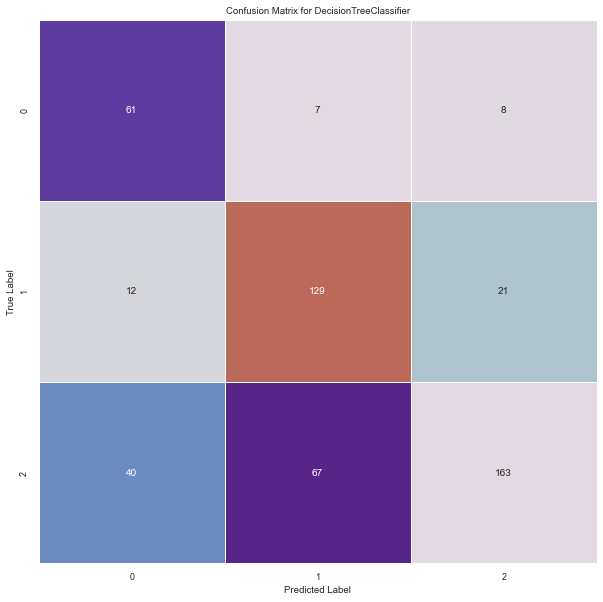

In [165]:
# Plot confusion matrix for DecisionTreeClassifier .
import matplotlib.pyplot as plt
matrix = confusion_matrix(y_test,y_pred_test)
plt.figure(figsize=(10,10))
sns.heatmap(matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for DecisionTreeClassifier')

### save the model
### ----------------------

In [166]:
import joblib 
joblib.dump( search, "credit card.h5")
joblib.dump( x_train.columns,"credit card coulmns.h5")

['credit card coulmns.h5']